#Predicción de precios con modelo de Árbol de Decisiones

In [62]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

##Seleccionamos la data

In [63]:
# Fuente: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
melbourne_file_path = '/content/drive/MyDrive/Data Kaggle/melb_data.csv'
# read la data
melbourne_data = pd.read_csv(melbourne_file_path) 
# imprimimos un resumen
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [64]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [65]:
filtered_melbourne_data = melbourne_data.dropna(axis=0)   #filtramos la data u eliminamos los datos n

Text(0.5, 1.0, 'Comportamiento de Precios filtrado')

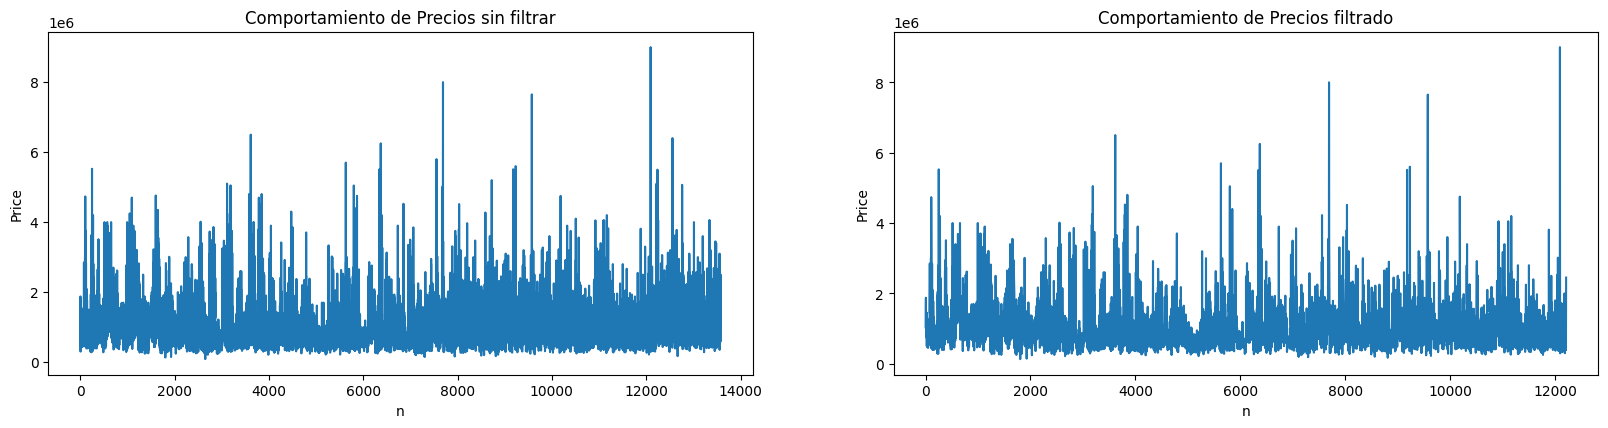

In [66]:
plt.figure(figsize=(20,10), dpi=100)

plt.subplot(221)
plt.plot(melbourne_data[['Price']])
plt.ylabel('Price')
plt.xlabel('n')
plt.title('Comportamiento de Precios sin filtrar')

plt.subplot(222)
plt.plot(filtered_melbourne_data[['Price']])
plt.ylabel('Price')
plt.xlabel('n')
plt.title('Comportamiento de Precios filtrado')

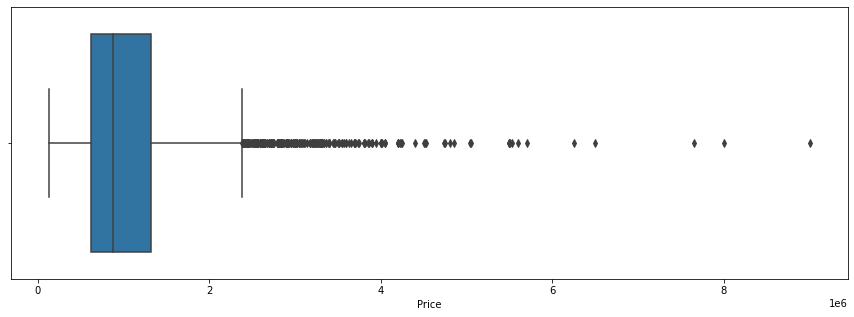

In [67]:
plt.figure(figsize=(15,5))
#sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=filtered_melbourne_data['Price'])

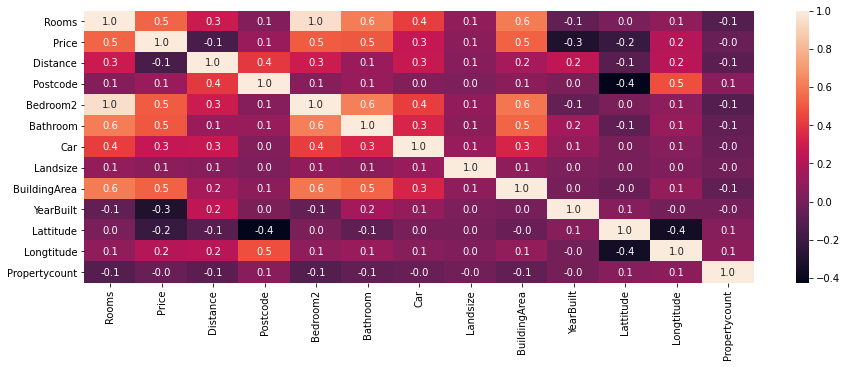

In [68]:
houses_corr = filtered_melbourne_data.corr() 
plt.figure(figsize=(15,5))
sns.heatmap(houses_corr,annot=True, fmt='.1f') #Se genera heatmap
plt.show()

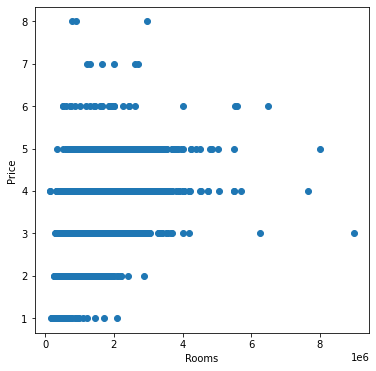

In [69]:
plt.figure(figsize=(6,6))
plt.scatter(filtered_melbourne_data['Price'],filtered_melbourne_data['Rooms']) # Grafiquemos como se ven nuestros datos.
plt.ylabel('Price')
plt.xlabel("Rooms")
plt.show()

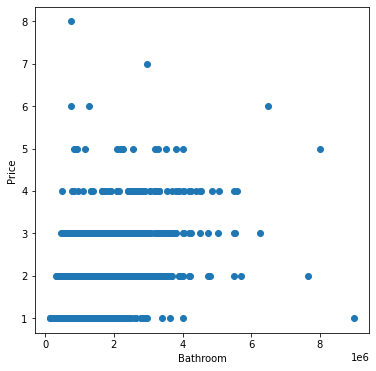

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(filtered_melbourne_data['Price'],filtered_melbourne_data['Bathroom']) # Grafiquemos como se ven nuestros datos.
plt.ylabel('Price')
plt.xlabel("Bathroom")
plt.show()

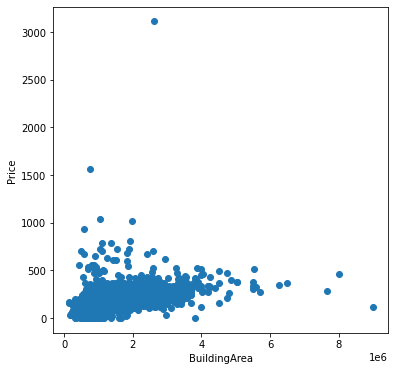

In [71]:
plt.figure(figsize=(6,6))
plt.scatter(filtered_melbourne_data['Price'],filtered_melbourne_data['BuildingArea']) # Grafiquemos como se ven nuestros datos.
plt.ylabel('Price')
plt.xlabel("BuildingArea")
plt.show()

##Seleccionamos la variable a predecir (variable dependiente)

In [72]:
y = filtered_melbourne_data['Price']    #definimos la variables dependiente
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

##Seleccionamos las variables independientes que nos permitiran hacer la predicción

In [73]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']   #definimos la variable independiente
X = filtered_melbourne_data[features]
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


##Construimos el modelo

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
melbourne_model = DecisionTreeRegressor(random_state=1)   #para obtener siempre el mismo resultado
melbourne_model.fit(X,y)   #entrenamos el modelo

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [76]:
print("Haremos predecciones de las primeras 5 casas")
print(X.head())

Haremos predecciones de las primeras 5 casas
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954


In [77]:
print("Las predicciones de precios son")
print(melbourne_model.predict(X.head()))

Las predicciones de precios son
[1035000. 1465000. 1600000. 1876000. 1636000.]


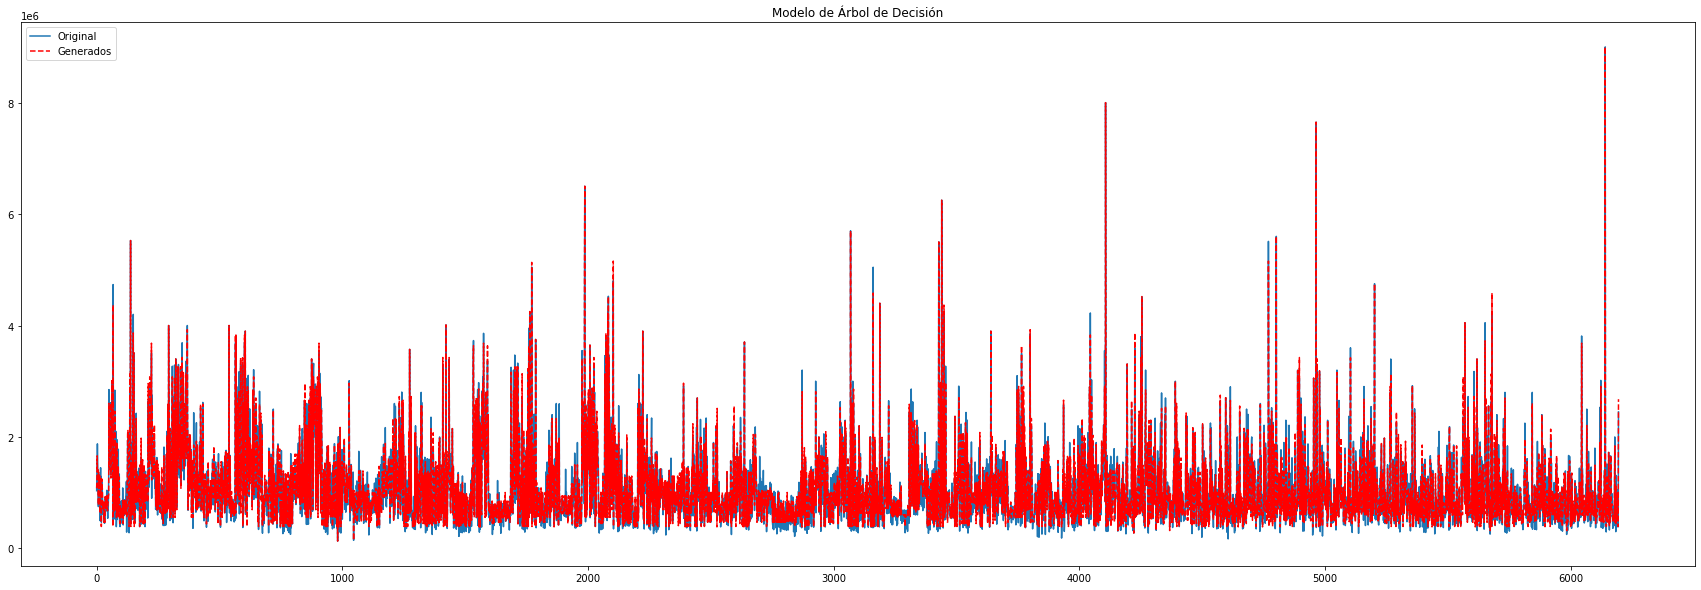

In [88]:
predict_y = melbourne_model.predict(X)

plt.figure(figsize=(30,10))
plt.plot(np.arange(len(y)),y,label="Original")
plt.plot(np.arange(len(y)),predict_y,'--',color="red", label="Generados")

plt.legend()
plt.title('Modelo de Árbol de Decisión')
plt.show()

##Validación del Modelo

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [81]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)    # Dividimos la data en entrenamiento y validacion #random state asegura siempre tener la misma division de la data

In [82]:
melbourne_model = DecisionTreeRegressor()   #definimos el modelo
melbourne_model.fit(train_X, train_y)   #entrenamos el modelo

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [83]:
val_predictions = melbourne_model.predict(val_X)
print(f'MAE: {mean_absolute_error(val_y, val_predictions)}')   #validamos el modelo con la data de testeo

MAE: 272616.7344523348


###Tenemos un MAE de 274.986 dolares, lo cual es un error medio absoluto alto, teniendo en cuanta que el precio promedio de las casas es de 1.075.000 aprox. Lo que significaria mas de un cuanto de desviación.

##Como podemos mejorar el modelo?

###Underfitting y Overfitting

####Utilizaremos la siguiente funcion para comparar los distintos MAE de diferentes valores de max_leaf_nodes

In [84]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

####Generamos un loop para comparar la precision de las distintos valores de max_leaf_nodes

In [85]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


La opcion 500 nodos es la que nos arroja un optimo de hojas (leaf)

In [89]:
melbourne_model = DecisionTreeRegressor(max_leaf_nodes=500)   #definimos los 500 nodos
melbourne_model.fit(X,y)   #entrenamos el modelo
melbourne_model.predict(X)
predict_y2 = melbourne_model.predict(X)

In [90]:
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - predict_y2)**2)

R2 = 1 - (SSE/SST) 
print(R2)

0.9356366324719332


In [91]:
r2_score(y,predict_y)

0.9356366324719332

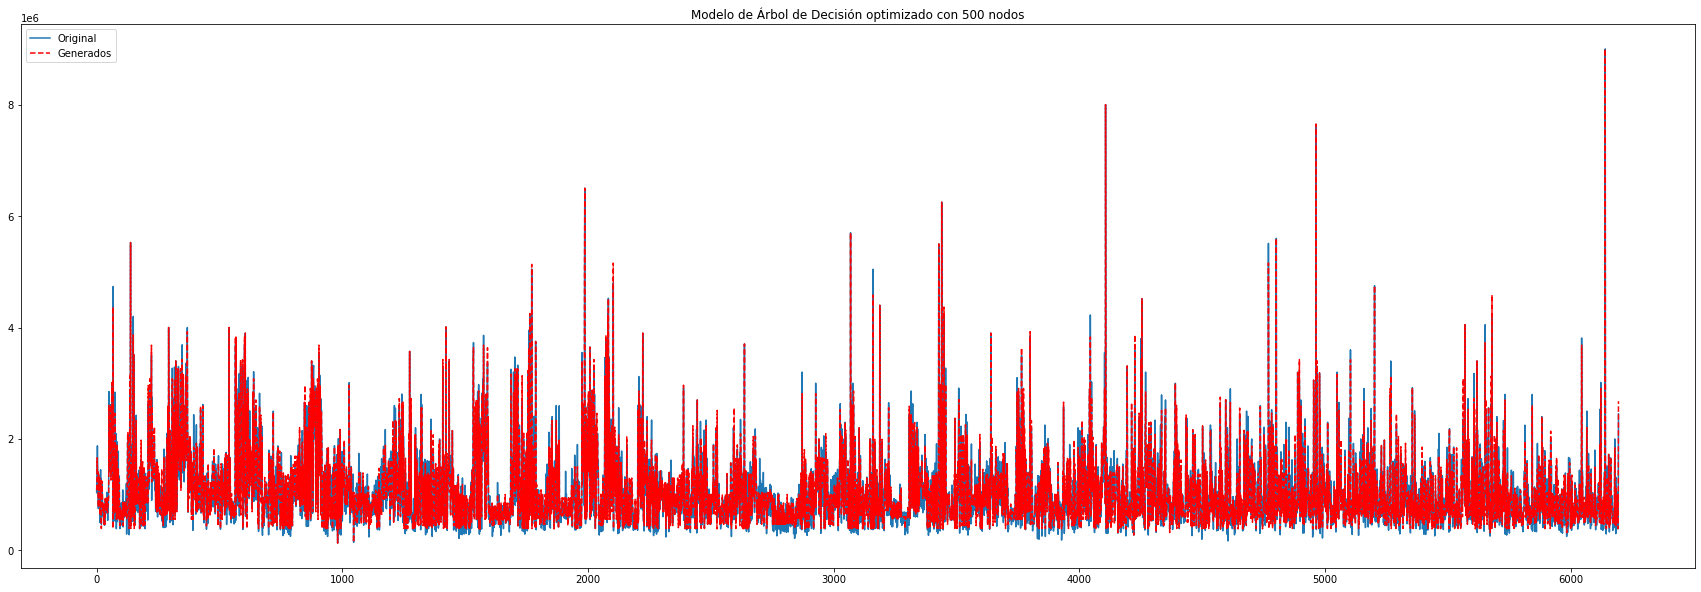

In [92]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(len(y)),y,label="Original")
plt.plot(np.arange(len(y)),predict_y2,'--',color="red", label="Generados")

plt.legend()
plt.title('Modelo de Árbol de Decisión optimizado con 500 nodos')
plt.show()

##Conclusiones
Logramos optimizar el modelos,  y mejorar el MAE. Por otro lado, logramos obtener un R2 de 93%, convirtiendolo en un modelo de predicción de precios fiable.